In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('BrentOilPrices.csv')

In [37]:
df.head(10)

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
5,"May 27, 1987",18.60
6,"May 28, 1987",18.60
7,"May 29, 1987",18.58
8,"Jun 01, 1987",18.65
9,"Jun 02, 1987",18.68


In [38]:
df.isna().sum()

Date     0
Price    0
dtype: int64

In [39]:
#  Need to convert Date column to standard format
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Text(0.5, 1.0, 'Brent Oil Price Trend')

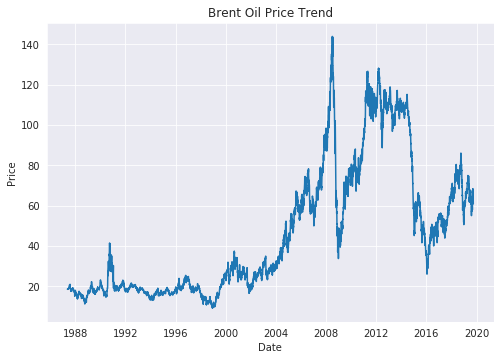

In [40]:
# Visualizing Full Data as a line plot
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,5.5))
sns.lineplot(x='Date',y='Price',data = df)
plt.title("Brent Oil Price Trend")

In [41]:
# Function to plot Oil Price Trend between specific period

def plot_price_trend(df, start_date, end_date):
    """
    This function filters the dataframe for the specified date range and 
    plots the line plot of the data using seaborn.
    
    The dataframe may not be indexed on any Datetime column.
    In this case, we use mask to filter out the date.
    """
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title("Brent Oil Price Trend")

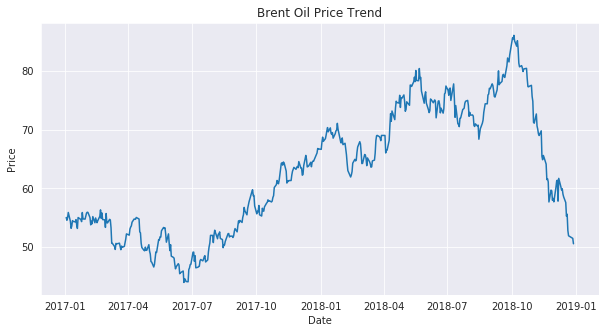

In [42]:
plot_price_trend(df,'2017-01-01','2019-01-01')

## Forecast Model - Prophet

In [43]:
# import the Prophet class from fbprophet module and then create an instance of this.
from fbprophet import Prophet
m = Prophet()

Note that Prophet requires the date column as 'ds' and outcome varible as 'y'. So we change this in our dataframe and check its data.

In [44]:
pro_df = df
pro_df.columns = ['ds','y']
pro_df.head()


,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Next we fit this dataframe into the model object created and then create a forecast for the Oil Price for the next 90 days.

In [45]:
m.fit(pro_df)
future = m.make_future_dataframe(periods = 90)
forecast = m.predict(future)

We check the forecast data has several components - trend, weakly and yearly seasonality - and for each of these components, we have the lower and upper confidence intervals data.

In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.517478,1.454544,33.588697,16.517478,16.517478,1.005671,1.005671,1.005671,-0.439655,-0.439655,-0.439655,1.445326,1.445326,1.445326,0.0,0.0,0.0,17.523149
1,1987-05-21,16.520978,2.534405,33.797085,16.520978,16.520978,1.174547,1.174547,1.174547,-0.279999,-0.279999,-0.279999,1.454546,1.454546,1.454546,0.0,0.0,0.0,17.695525
2,1987-05-22,16.524478,2.242337,33.336280,16.524478,16.524478,1.089747,1.089747,1.089747,-0.372058,-0.372058,-0.372058,1.461805,1.461805,1.461805,0.0,0.0,0.0,17.614225
3,1987-05-25,16.534977,1.035143,31.984791,16.534977,16.534977,1.124346,1.124346,1.124346,-0.345335,-0.345335,-0.345335,1.469681,1.469681,1.469681,0.0,0.0,0.0,17.659322
4,1987-05-26,16.538476,1.025072,33.584513,16.538476,16.538476,1.009948,1.009948,1.009948,-0.457174,-0.457174,-0.457174,1.467121,1.467121,1.467121,0.0,0.0,0.0,17.548424


We plot these components of the forecast fit model.

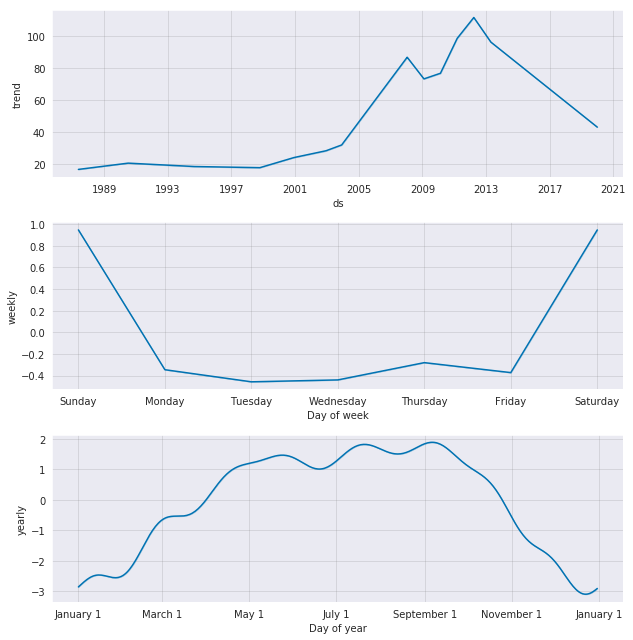

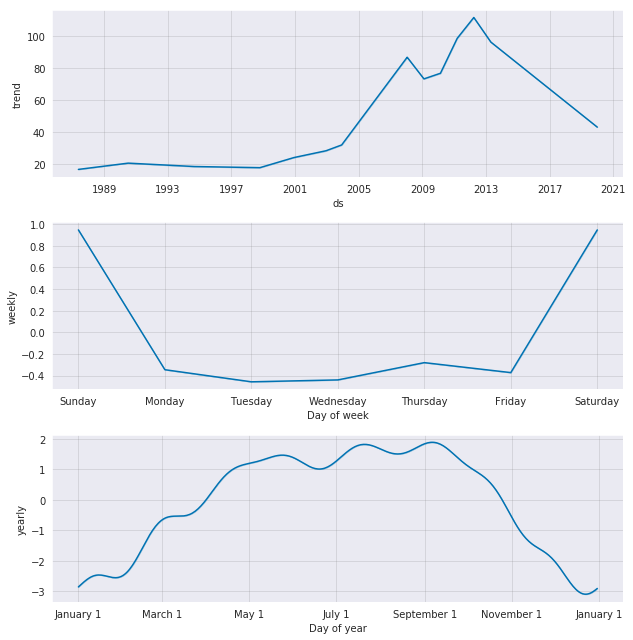

In [47]:
m.plot_components(forecast)

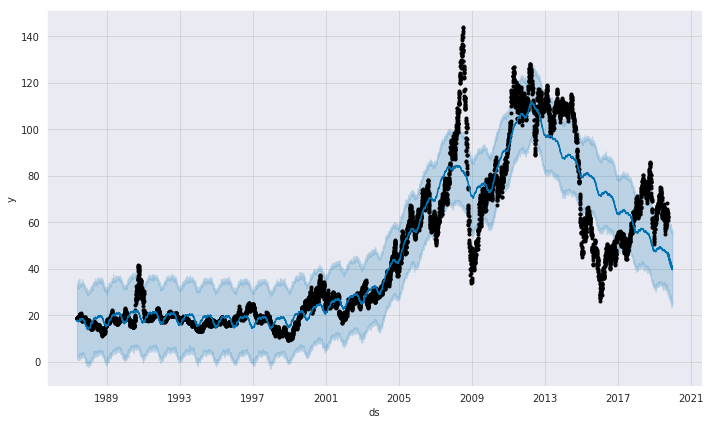

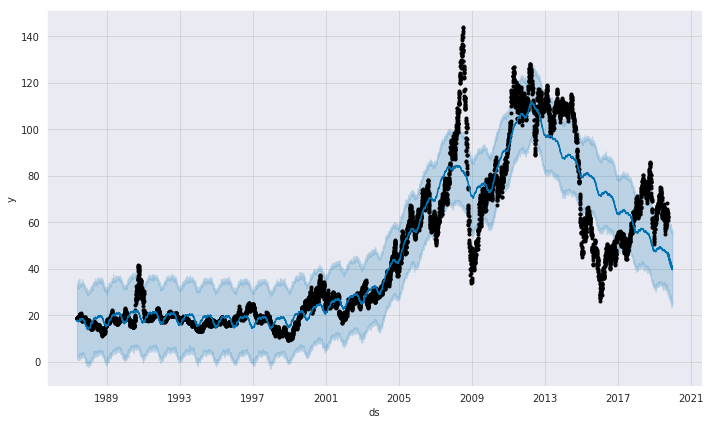

In [48]:
m.plot(forecast)

Next we want to visualize side by side the original data and the forecast data. So for this, we join the original and forecast data on the column 'ds'

In [49]:
cmp_df = forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(pro_df.set_index('ds'))

In [50]:
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
1987-05-20,17.523149,1.454544,33.588697,18.63
1987-05-21,17.695525,2.534405,33.797085,18.45
1987-05-22,17.614225,2.242337,33.336280,18.55
1987-05-25,17.659322,1.035143,31.984791,18.60
1987-05-26,17.548424,1.025072,33.584513,18.63


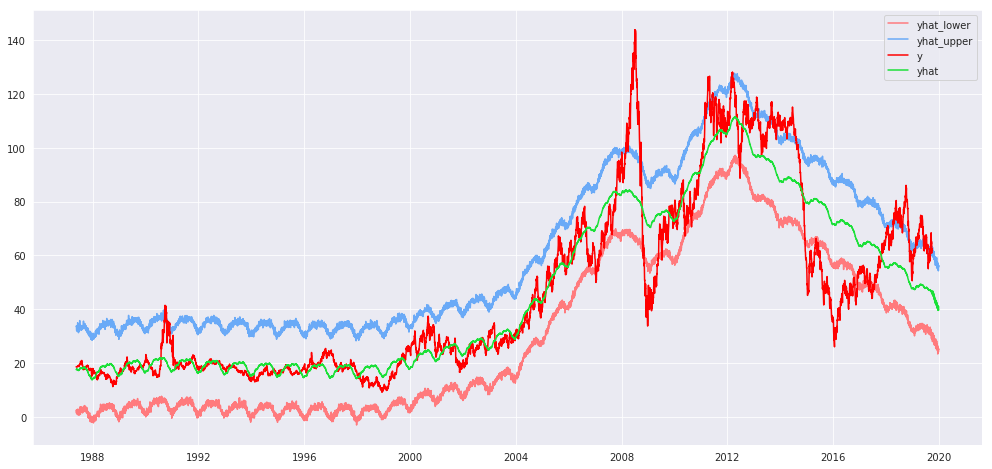

In [54]:
# Then, we visualize the original and forecast data alongside each other
plt.figure(figsize=(17,8))
plt.plot(cmp_df['y'],color='red')
plt.plot(cmp_df['yhat_lower'],color='#ff7a7d')
plt.plot(cmp_df['yhat_upper'],color='#6aaaf7')
plt.plot(cmp_df['yhat'],color='#1be038')
plt.legend()
plt.show()


From above graph, we are not able to readily see how many months data was forecast.

So, We need a function which will show us the original and forecast data between a specified date range.

In [52]:
def plot_price_forecast(df,start_date, end_date):
    """
    This function filters the dataframe for the specified date range and 
    plots the actual and forecast data.
    
    Assumption: 
    - The dataframe has to be indexed on a Datetime column
    This makes the filtering very easy in pandas using df.loc
    """
    cmp_df = df.loc[start_date:end_date]
    plt.figure(figsize=(17,8))
    plt.plot(cmp_df['yhat'])
    plt.plot(cmp_df['y'])
    plt.legend()
    plt.show()


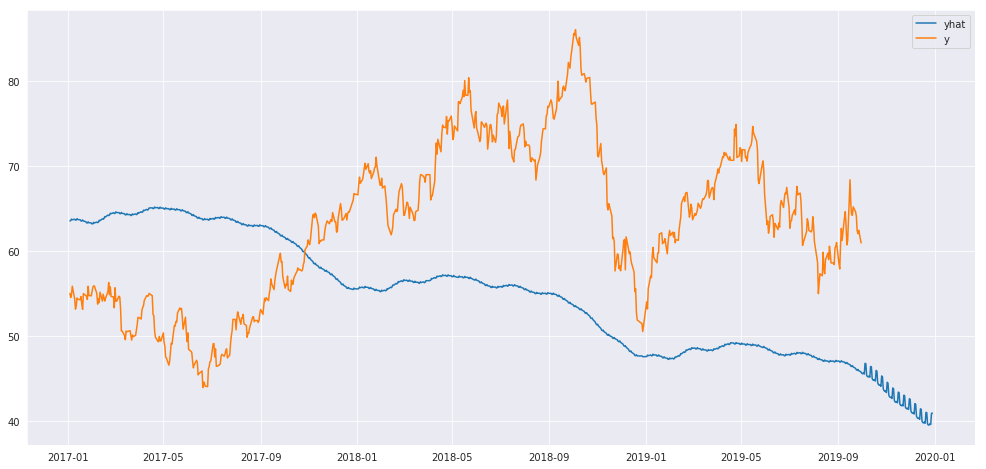

In [53]:
plot_price_forecast(cmp_df,'2017-01-01','2020-01-01')